# Data-Driven Approach to Predict the Success of Bank Telemarketing

## Objective
The objective is to establish features/characteristics that help a bank identify whether a customer will subscribe to a term deposit or not 

## Evaluation Metric

- Area under Curve
- ROC
- F1 score

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Exploration

The dataset has 20 features and a target. It is comprises of Numeric and categorical columns. The dataset has no missing data

In [14]:
data = pd.read_csv("bank-additional-full.csv", sep=";")
data.shape

(41188, 21)

In [15]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Age
The mean, minimum, and maximum age is 40, 17 and 98 years. The maximum age (98) is greater than 2 std (10) from the 75 percentile (47) of the distribution indicating that the age distribution has outliers (right skewed).

Reviewing Age with occupation revealed that 


In [16]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

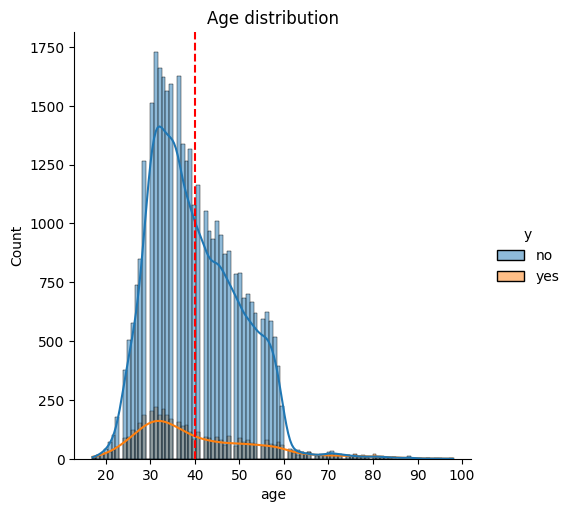

In [29]:
sns.displot(x = "age", data = data, hue="y", kde = True);
plt.title("Age distribution")
plt.axvline(x=data.age.mean(),
            color='red',
            ls='--', 
            lw=1.5);

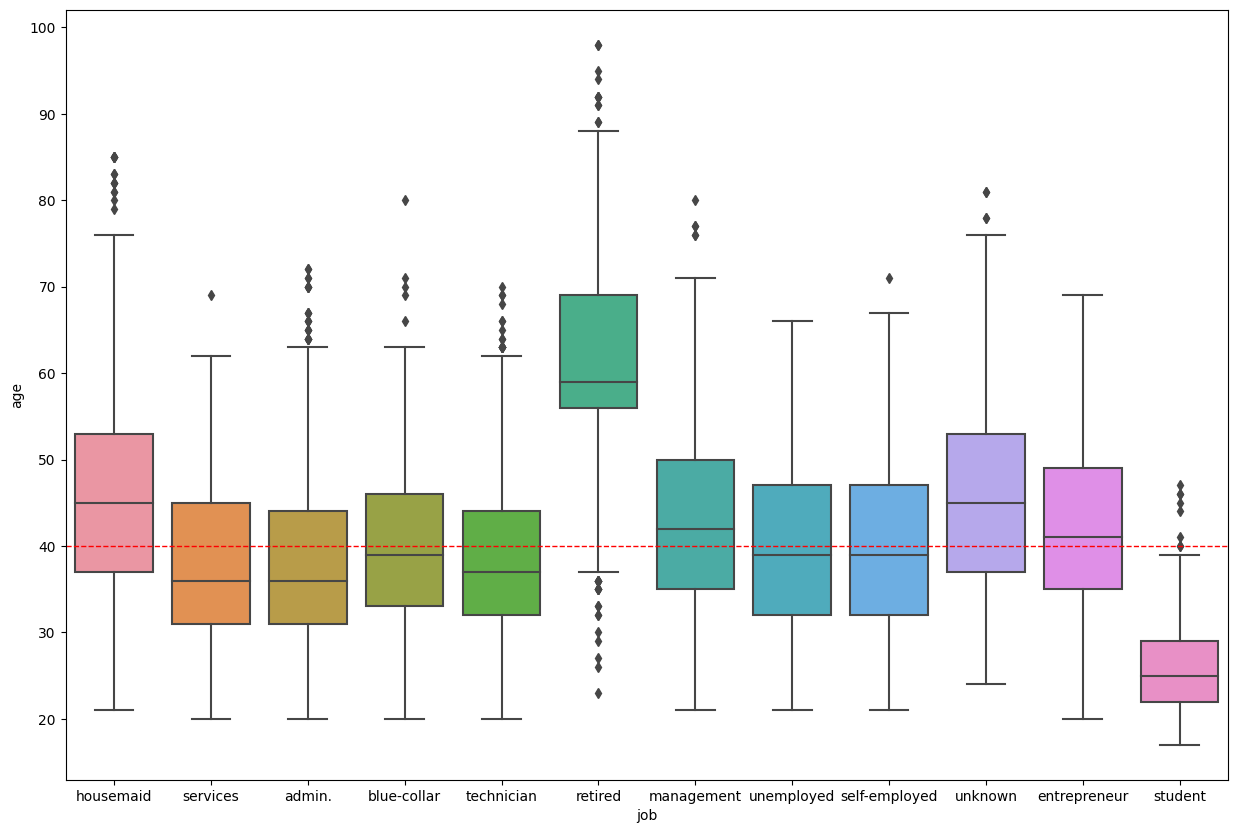

In [32]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(data=data, x="job", y = "age");
plt.axhline(data.age.mean(), color='red',
            ls='--', 
            lw=1);

### Subscription - Target Variable